<a href="https://colab.research.google.com/github/YunSeoHwan/DNN_Study/blob/main/C3_predict_sin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **사인 함수 3차 다항식으로 예측**

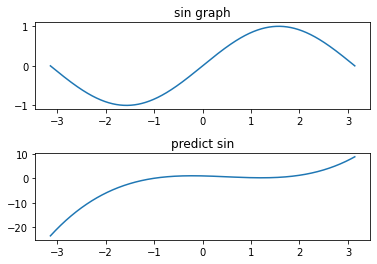

In [21]:
import math
import torch
import matplotlib.pyplot as plt

# -pi부터 pi 사이 점 1000개 추출(일정 간격)
x = torch.linspace(-math.pi, math.pi, 1000)

# sin에서 추출한 값을 y
y = torch.sin(x)

# 임의의 가중치 만들기
a = torch.randn(())
b = torch.randn(())
c = torch.randn(())
d = torch.randn(())

# 예측할 3차 다항식
y_random = a * x**3 + b * x**2 + c * x + d

# 실제 사인곡선
plt.subplot(2, 1, 1)
plt.title('sin graph')
plt.plot(x, y)

# 예측 사인곡선
plt.subplot(2, 1, 2)
plt.title('predict sin')
plt.plot(x, y_random)

# 간격 조정
plt.subplots_adjust(hspace=0.5)

# 출력
plt.show()

# **가중치 학습**

epoch1 loss : 41706.12109375
epoch101 loss : 1326.1568603515625
epoch201 loss : 1091.7100830078125
epoch301 loss : 900.6842041015625
epoch401 loss : 743.4273071289062
epoch501 loss : 613.9343872070312
epoch601 loss : 507.2747802734375
epoch701 loss : 419.39813232421875
epoch801 loss : 346.9766845703125
epoch901 loss : 287.2756042480469
epoch1001 loss : 238.04681396484375
epoch1101 loss : 197.44183349609375
epoch1201 loss : 163.9405517578125
epoch1301 loss : 136.292236328125
epoch1401 loss : 113.46782684326172
epoch1501 loss : 94.6202163696289
epoch1601 loss : 79.05203247070312
epoch1701 loss : 66.18904113769531
epoch1801 loss : 55.55807113647461
epoch1901 loss : 46.769195556640625


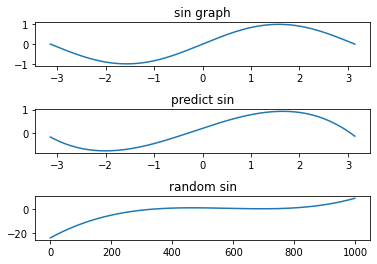

In [22]:
# 학습률 정의 0.000001
learning_rate = 1e-6

# 학습 2000번 진행
for epoch in range(2000):
    y_pred = a * x**3 + b * x**2 + c * x + d

    # loss fuction
    loss = (y_pred - y).pow(2).sum().item()

    # 100번마다 loss 출력
    if epoch % 100 == 0:
        print(f"epoch{epoch+1} loss : {loss}")
    
    # 기울기 미분값
    grad_y_pred = 2.0 * (y_pred - y)
    grad_a = (grad_y_pred * x ** 3).sum()
    grad_b = (grad_y_pred * x ** 2).sum()
    grad_c = (grad_y_pred * x).sum()
    grad_d = grad_y_pred.sum()

    # 가중치 업데이트
    a -= learning_rate * grad_a
    b -= learning_rate * grad_b
    c -= learning_rate * grad_c
    d -= learning_rate * grad_d

# 실제 사인 곡선
plt.subplot(3, 1, 1)
plt.title('sin graph')
plt.plot(x, y)

# 에측 사인 곡선
plt.subplot(3, 1, 2)
plt.title('predict sin')
plt.plot(x, y_pred)

# 랜덤 가중치 사인
plt.subplot(3, 1, 3)
plt.title("random sin")
plt.plot(y_random)

# 간격 조정
plt.subplots_adjust(hspace=1)

# 출력
plt.show()